In [2]:
# 数据集：https://github.com/albertsl/datasets
# 原文链接：https://mp.weixin.qq.com/s?__biz=MzUyOTAwMzI4NA==&mid=2247508542&idx=1&sn=1acd06e08f32ce51283afafced184877&chksm=fa654445cd12cd53ec4f0bbddb85cc3479ee60a7252007acd43302824acbb755d273aa383c8f&scene=132#wechat_redirect
# 这些数据集都是与人工智能相关的三个术语（数据科学，机器学习和深度学习）在互联网上搜索流行度的数据，从搜索引擎中提取而来。
# 该数据集包含了两个文件temporal.csv和mapa.csv。
# 在这个教程中，我们将更多使用的第一个包括随时间推移（从2004年到2020年）的三个术语的受欢迎程度数据。另外，我添加了一个分类变量（1和0）来演示带有分类变量的图表的功能。
# mapa.csv文件包含按国家/地区分隔的受欢迎程度数据。在最后的可视化地图时，我们会用到它。


In [1]:
import pandas as pd
df = pd.read_csv('temporal.csv')
df.head(10) #View first 10 data rows

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [2]:
df.describe()
# 使用命令描述，我们将看到数据如何分布，最大值，最小值，均值……


,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [3]:
df.info()
# 使用info命令，我们将看到每列包含的数据类型。我们可以发现一列的情况，当使用head命令查看时，该列似乎是数字的，但是如果我们查看后续数据，则字符串格式的值将被编码为字符串。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [4]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [5]:
df.head(10)

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


In [6]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [8]:
format_dict = {'data science':'${0:,.2f}', 'Mes':'{:%m-%Y}', 'machine learning':'{:.2%}'}
#We make sure that the Month column has datetime format
df['Mes'] = pd.to_datetime(df['Mes'])
#We apply the style to the visualization
df.head(10).style.format(format_dict)
# 为了给出每种类型的示例，我添加了货币和百分比符号，即使它们对于此数据没有任何意义。

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1
5,06-2004,$9.00,1700.00%,3,1
6,07-2004,$9.00,1600.00%,3,1
7,08-2004,$7.00,1400.00%,3,1
8,09-2004,$10.00,1700.00%,4,1
9,10-2004,$8.00,1700.00%,4,1


In [9]:
format_dict = {'Mes':'{:%m-%Y}'} #Simplified format dictionary with values that do make sense for our data
df.head(10).style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')
# 我们可以用颜色突出显示最大值和最小值。


,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [10]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn')
# 我们使用颜色渐变来显示数据值。


,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [11]:
df.head(10).style.format(format_dict).bar(color='red', subset=['data science', 'deep learning'])
# 我们也可以用条形显示数据值。


,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [12]:
df.head(10).style.format(format_dict).background_gradient(subset = ['data science','machine learning'],cmap ='BuGn').highlight_max(color ='yellow')

# 此外，我们还可以结合以上功能并生成更复杂的可视化效果。


,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


In [13]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='report.html')
# Pandas分析是一个库，可使用我们的数据生成交互式报告，我们可以看到数据的分布，数据的类型以及可能出现的问题。它非常易于使用，只需三行，我们就可以生成一个报告，该报告可以发送给任何人，即使您不了解编程也可以使用。

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 143.19it/s]


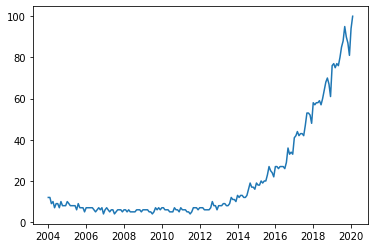

In [14]:
# Matplotlib是用于以图形方式可视化数据的最基本的库。它包含许多我们可以想到的图形。仅仅因为它是基本的并不意味着它并不强大，我们将要讨论的许多其他数据可视化库都基于它。
# Matplotlib的图表由两个主要部分组成，即轴（界定图表区域的线）和图形（我们在其中绘制轴，标题和来自轴区域的东西），现在让我们创建最简单的图：
import matplotlib.pyplot as plt
plt.plot(df['Mes'], df['data science'], label='data science') 
# The parameter label is to indicate the legend. This doesn't mean that it will be shown, we'll have to use another command that I'll explain later.

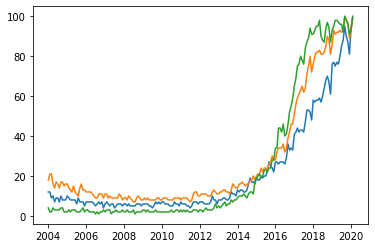

In [15]:
plt.plot(df['Mes'],df['data science'],label ='data science')
plt.plot(df['Mes'],df['machine learning'],label ='machine learning ')
plt.plot(df['Mes'],df['deep learning'],label ='deep learning')
# 我们可以在同一张图中制作多个变量的图,然后进行比较。


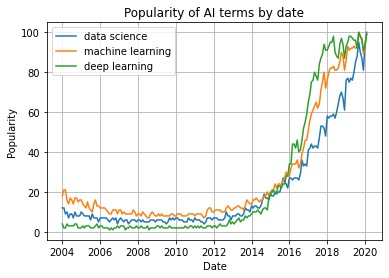

In [16]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.legend()
# 每种颜色代表哪个变量还不是很清楚。我们将通过添加图例和标题来改进图表。


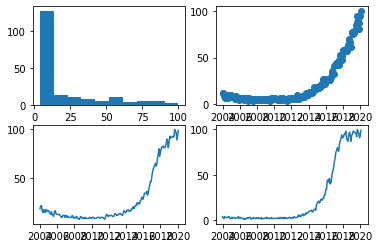

In [17]:
fig, axes = plt.subplots(2,2)
axes[0, 0].hist(df['data science'])
axes[0, 1].scatter(df['Mes'], df['data science'])
axes[1, 0].plot(df['Mes'], df['machine learning'])
axes[1, 1].plot(df['Mes'], df['deep learning'])
# 我们可以在一个图形中制作多个图形。这对于比较图表或通过单个图像轻松共享几种图表类型的数据非常有用。

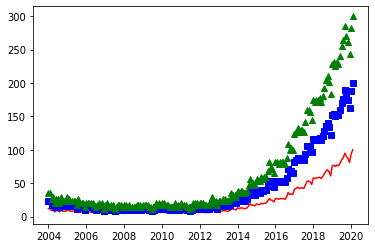

In [18]:
plt.plot(df ['Mes'],df ['data science'],'r-')
plt.plot(df ['Mes'],df ['data science'] * 2,'bs')
plt.plot(df ['Mes'],df ['data science'] * 3,'g ^')
# 我们可以为每个变量的点绘制具有不同样式的图形：


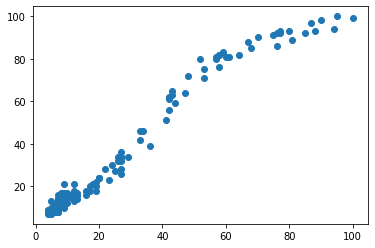

In [19]:
plt.scatter(df['data science'], df['machine learning'])
# 现在让我们看一些使用Matplotlib可以做的不同图形的例子。我们从散点图开始：


<BarContainer object of 194 artists>

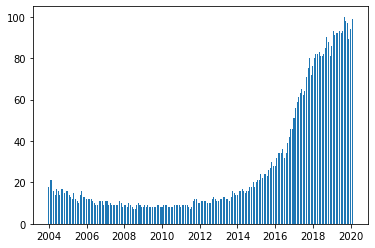

In [20]:
plt.bar(df['Mes'],df['machine learning'],width = 20)
# 条形图示例：

(array([117.,  14.,   5.,   6.,   2.,   3.,   6.,   1.,   2.,   1.,   1.,
          5.,   1.,  13.,  17.]),
 array([  1. ,   7.6,  14.2,  20.8,  27.4,  34. ,  40.6,  47.2,  53.8,
         60.4,  67. ,  73.6,  80.2,  86.8,  93.4, 100. ]),
 <BarContainer object of 15 artists>)

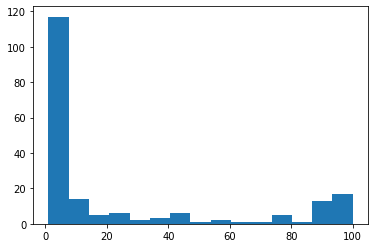

In [21]:
plt.hist(df['deep learning'],bins = 15)
# 直方图示例：


Text(14600, 80, '$\\lambda=1, r^2=0.8$')

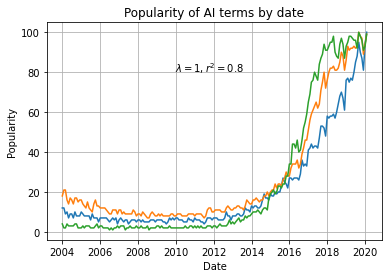

In [22]:
plt.plot(df['Mes'], df['data science'], label='data science')
plt.plot(df['Mes'], df['machine learning'], label='machine learning')
plt.plot(df['Mes'], df['deep learning'], label='deep learning')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.text(x=14600, y=80, s=r'$\lambda=1, r^2=0.8$') #Coordinates use the same units as the graph
# plt.annotate('Notice something?', xy=('2014-01-01', 30), xytext=('2006-01-01', 50), arrowprops={'facecolor':'red', 'shrink':0.05})

D:\Program Files\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mes', ylabel='data science'>

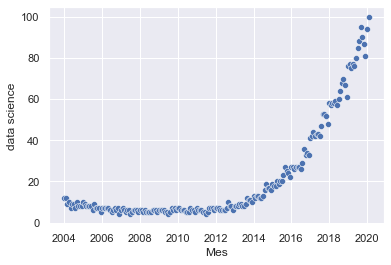

In [23]:
import seaborn as sns
sns.set()
sns.scatterplot(df['Mes'], df['data science'])
# Seaborn 是基于 Matplotlib 的库。基本上，它提供给我们的是更好的图形和功能，只需一行代码即可制作复杂类型的图形。
# 我们导入库并使用 sns.set（）初始化图形样式，如果没有此命令，图形将仍然具有与 Matplotlib 相同的样式。我们显示了最简单的图形之一，散点图：

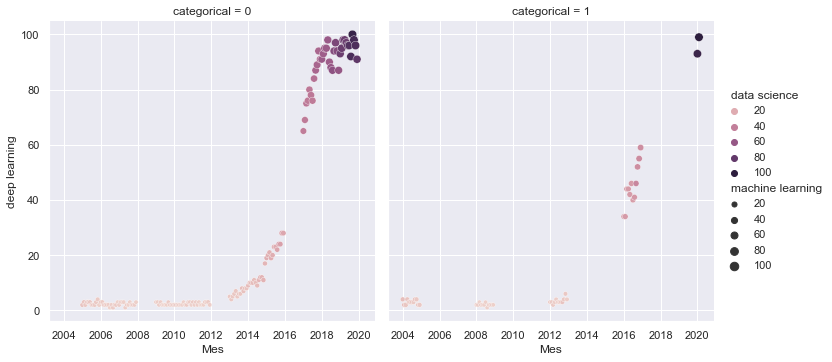

In [24]:
sns.relplot(x='Mes', y='deep learning', hue='data science', size='machine learning', col='categorical', data=df)
# 我们可以在同一张图中添加两个以上变量的信息。为此，我们使用颜色和大小。我们还根据类别列的值制作了一个不同的图：


<AxesSubplot:>

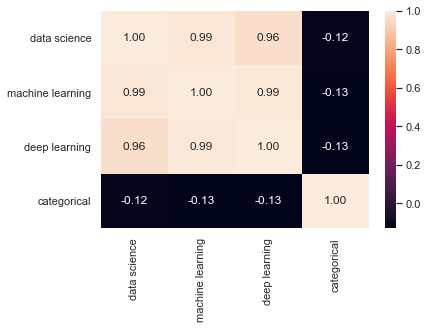

In [25]:
sns.heatmap(df.corr(),annot = True,fmt ='.2f')
# Seaborn 提供的最受欢迎的图形之一是热图。通常使用它来显示数据集中变量之间的所有相关性：


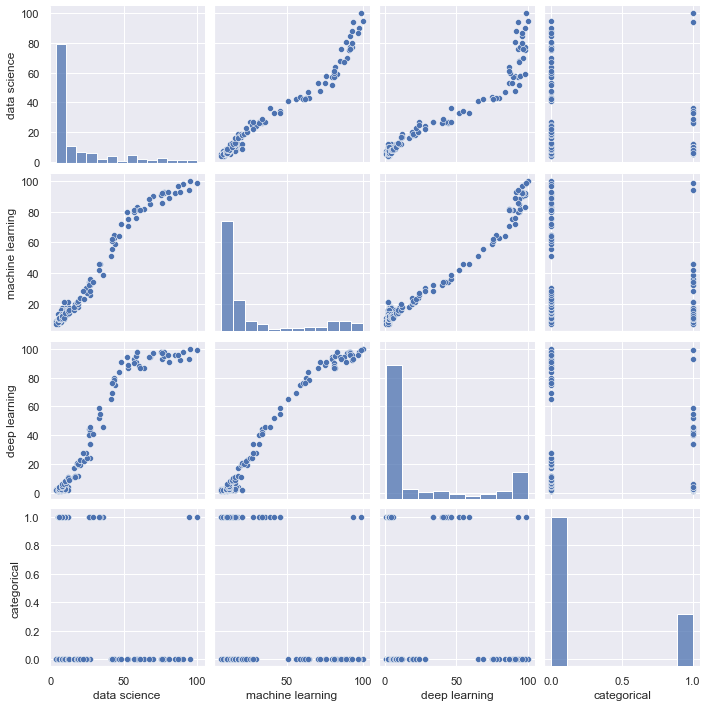

In [26]:
sns.pairplot(df)
# 另一个最受欢迎的是配对图，它向我们显示了所有变量之间的关系。如果您有一个大数据集，请谨慎使用此功能，因为它必须显示所有数据点的次数与有列的次数相同，这意味着通过增加数据的维数，处理时间将成倍增加。

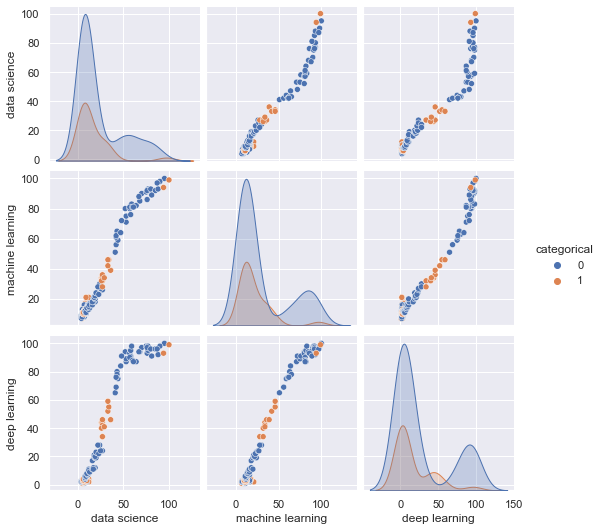

In [27]:
sns.pairplot(df,hue ='categorical')
# 现在让我们做一个成对图，显示根据分类变量的值细分的图表。


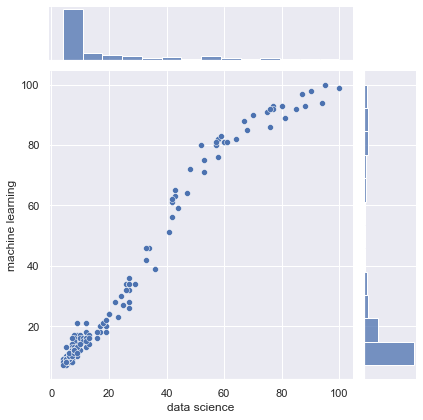

In [28]:
sns.jointplot(x='data science', y='machine learning', data=df)
# 联合图是一个非常有用的图，它使我们可以查看散点图以及两个变量的直方图，并查看它们的分布方式：


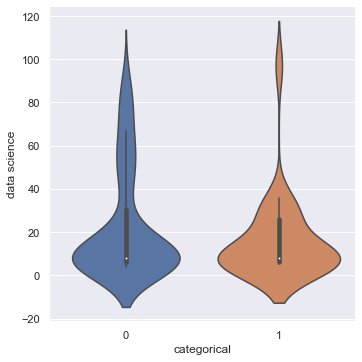

In [29]:
sns.catplot(x='categorical', y='data science', kind='violin', data=df)
# 另一个有趣的图形是 ViolinPlot：


Text(0.5, 1.0, 'Machine Learning')

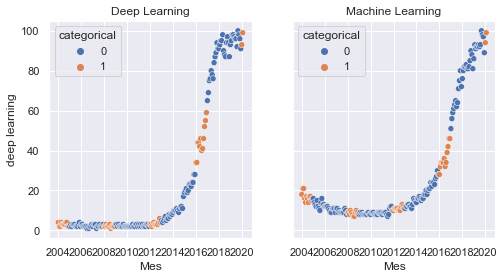

In [30]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning')
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning')
# 我们可以像使用 Matplotlib 一样在一个图像中创建多个图形：


In [31]:
from bokeh.plotting import figure, output_file, save,gridplot
output_file('data_science_popularity.html')
# Bokeh 是一个库，可用于生成交互式图形。我们可以将它们导出到 HTML 文档中，并与具有 Web 浏览器的任何人共享。
# 当我们有兴趣在图形中查找事物并且希望能够放大并在图形中移动时，它是一个非常有用的库。或者，当我们想共享它们并给其他人探索数据的可能性时。
# 我们首先导入库并定义将要保存图形的文件：

In [32]:
p = figure(title='data science', x_axis_label='Mes', y_axis_label='data science')
p.line(df['Mes'], df['data science'], legend='popularity', line_width=2)
save(p)
# 我们绘制所需内容并将其保存在文件中：


'h:\\Code\\collection_python\\data_visualization\\data_science_popularity.html'

In [33]:
output_file('multiple_graphs.html')
s1 = figure(width=250, plot_height=250, title='data science')
s1.circle(df['Mes'], df['data science'], size=10, color='navy', alpha=0.5)
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title='machine learning') #share both axis range
s2.triangle(df['Mes'], df['machine learning'], size=10, color='red', alpha=0.5)
s3 = figure(width=250, height=250, x_range=s1.x_range, title='deep learning') #share only one axis range
s3.square(df['Mes'], df['deep learning'], size=5, color='green', alpha=0.5)
p = gridplot([[s1, s2, s3]])
save(p)

'h:\\Code\\collection_python\\data_visualization\\multiple_graphs.html'

In [34]:
import folium
m1 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=18)
m1.save('map1.html')
# Folium是一项研究，可以让我们绘制地图，标记，也可以在上面绘制数据。Folium让我们选择地图的提供者，这决定了地图的样式和质量。在本文中，为简单起见，我们仅将OpenStreetMap视为地图提供者。
# 使用地图非常复杂，值得一读。在这里，我们只是看一下基础知识，并用我们拥有的数据绘制几张地图。
# 让我们从基础开始，我们将绘制一个简单的地图，上面没有任何内容。

In [35]:
m2 = folium.Map(location=[41.38, 2.17], tiles='openstreetmap', zoom_start=16)
folium.Marker([41.38, 2.176], popup='<i>You can use whatever HTML code you want</i>', tooltip='click here').add_to(m2)
folium.Marker([41.38, 2.174], popup='<b>You can use whatever HTML code you want</b>', tooltip='dont click here').add_to(m2)
m2.save('map2.html')
# 我们为地图生成一个交互式文件，您可以在其中随意移动和缩放。
# 我们可以在地图上添加标记：